In [1]:
import pandas as pd


In [2]:
df=pd.read_csv('car data.csv')

In [3]:
df.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
categorical_feature=[feature for feature in df.columns if df[feature].dtypes=='O' ]

In [6]:
df[categorical_feature]




,Car_Name,Fuel_Type,Seller_Type,Transmission
0,ritz,Petrol,Dealer,Manual
1,sx4,Diesel,Dealer,Manual
2,ciaz,Petrol,Dealer,Manual
3,wagon r,Petrol,Dealer,Manual
4,swift,Diesel,Dealer,Manual
...,...,...,...,...
296,city,Diesel,Dealer,Manual
297,brio,Petrol,Dealer,Manual
298,city,Petrol,Dealer,Manual
299,city,Diesel,Dealer,Manual


In [7]:
## null values

df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
##year is always dummy or garbage feature but here this involved in car price prediction so year cant be dropped

In [10]:
df['No_Of_Year']=2021-df['Year']  ##  here i m making this model in 2021 so i use 2021

In [11]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_Of_Year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [12]:
df.drop('Year',axis=1)

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_Of_Year
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,7
...,...,...,...,...,...,...,...,...,...
296,city,9.50,11.60,33988,Diesel,Dealer,Manual,0,5
297,brio,4.00,5.90,60000,Petrol,Dealer,Manual,0,6
298,city,3.35,11.00,87934,Petrol,Dealer,Manual,0,12
299,city,11.50,12.50,9000,Diesel,Dealer,Manual,0,4


In [13]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'No_Of_Year'],
      dtype='object')

In [14]:
x=df[['Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'No_Of_Year']]

In [15]:
x.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_Of_Year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [16]:
##one hot encoding for fuel type categories

final_dataset=pd.get_dummies(x,drop_first=True)

In [17]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_Of_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [20]:
final_dataset.corr()

import seaborn as sns

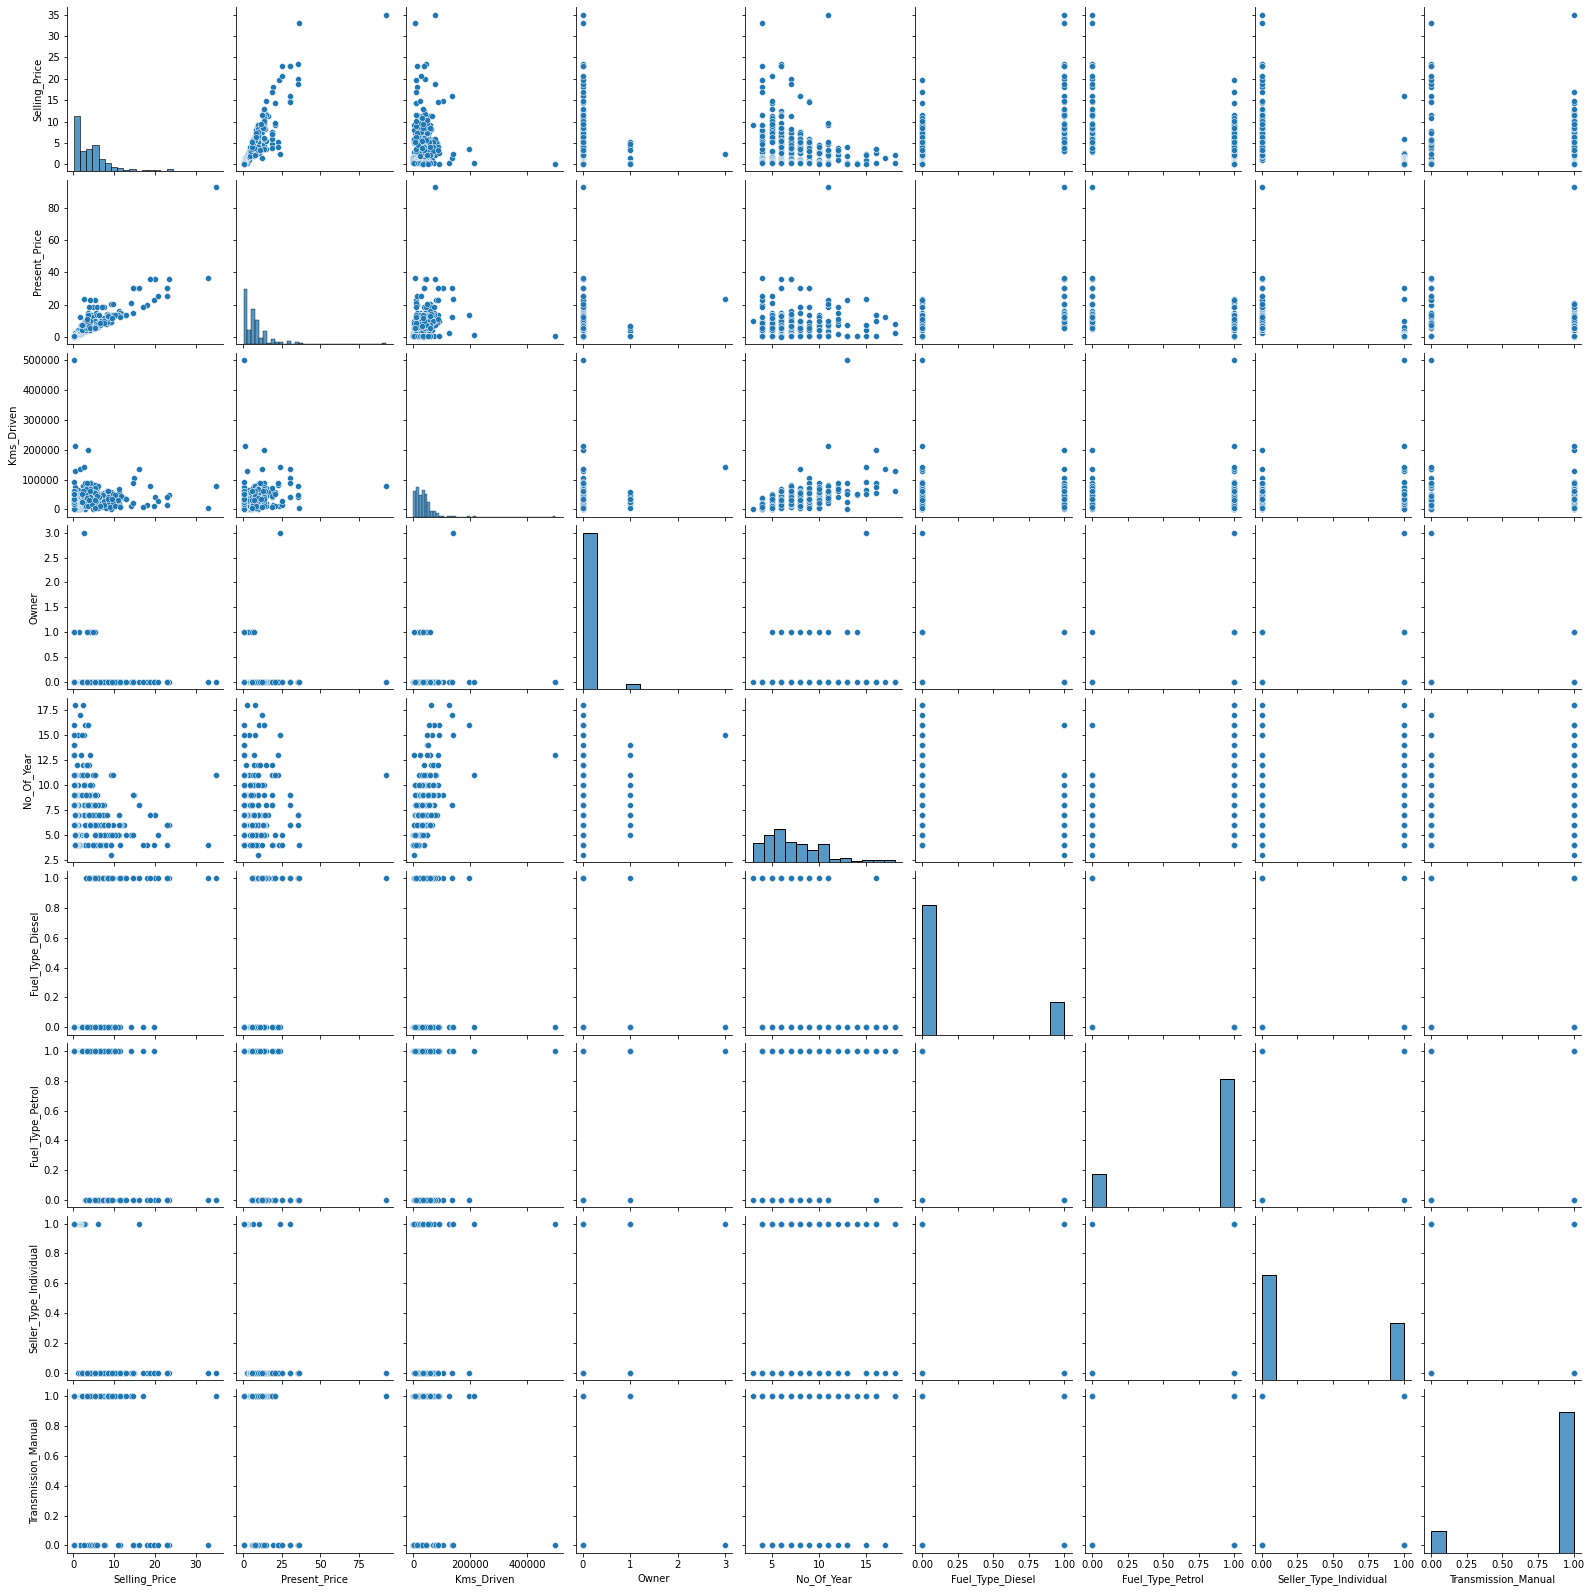

In [21]:
sns.pairplot(final_dataset)

In [22]:


import matplotlib.pyplot as plt
%matplotlib inline



In [23]:
corrmat=final_dataset.corr()

In [24]:
top_corr_features=corrmat.index

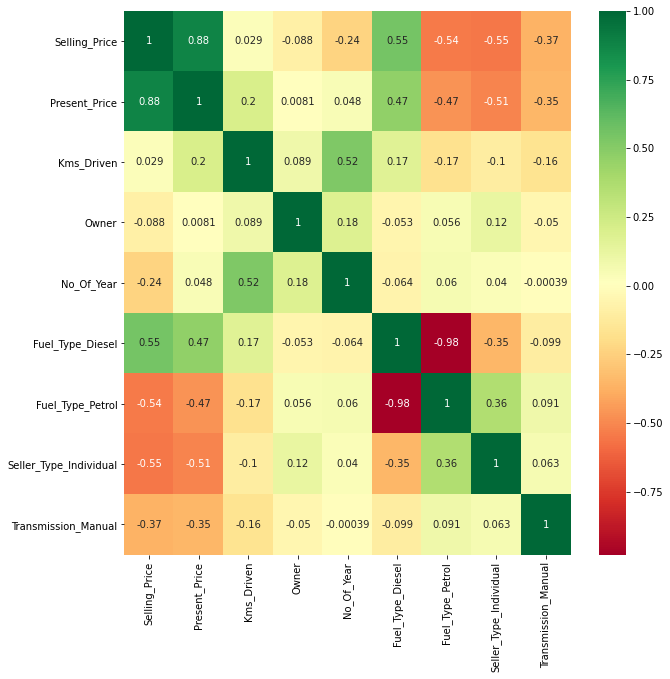

In [25]:
plt.figure(figsize=(10,10))

##plt heat map

g=sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap='RdYlGn')

In [26]:
## taking dependent and independent feature
x=final_dataset.iloc[:,1:]
y=final_dataset.iloc[:,0]

In [27]:
###  feature importance

from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [28]:
print(model.feature_importances_)

[3.34858408e-01 4.08353743e-02 3.30016050e-04 7.44062575e-02
 2.48973468e-01 5.10743558e-03 1.35006558e-01 1.60482482e-01]


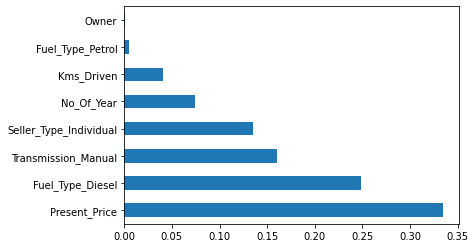

In [29]:
#plot graph of feature importance for better visualtization

feature_importances =pd.Series(model.feature_importances_,index=x.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()



In [30]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [31]:
x_train.shape,x_test.shape

((240, 8), (61, 8))

In [35]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

rf_random=RandomForestRegressor()

In [36]:
### hyper parameters 

n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]

In [37]:
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [38]:
## Randomized Search CV


# number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]

#number of features to consider at every split

max_features=['auto','sqrt']

# max_depth.append(None)

# Minimum number of samples required to split a node

min_samples_split =[2,5,10,15,100]

#minnimum number of samples required at each leaf node

min_samples_leaf=[1,2,5,10]

In [39]:
from sklearn.model_selection import RandomizedSearchCV


In [40]:
##Create the random grid

random_grid={'n_estimators':n_estimators,'max_features':max_features,'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf}

In [41]:
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [42]:
rf=RandomForestRegressor()



In [43]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1) 
#cv means cross validation #verbose is display iteration

In [44]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=7

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [45]:
predictions=rf_random.fit(x_test,y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=7

In [46]:
predictions=rf_random.predict(x_test)

In [47]:
predictions

array([ 0.32150011,  3.46359153,  0.44778943,  0.56878523,  0.24978877,
        1.16592221,  3.97043115,  4.50478084, 11.52731477,  6.90993464,
        4.38039456,  9.97797661,  5.15437788,  0.62168162, 13.92324609,
        0.42720147, 15.618836  , 16.41824354,  5.38239213,  4.69502145,
        0.57667607,  5.01461551,  1.19470458,  0.55541158, 11.03325261,
        0.5889683 ,  1.64170427,  3.00615544,  0.46076195,  0.33620167,
        5.58708002,  4.95510013,  1.29137626,  4.01153731,  0.3488939 ,
        0.51656172,  0.57516124,  0.31698671,  5.1317992 ,  1.35469008,
        0.63744717,  3.10459365,  4.35252596,  4.03152158,  0.23756597,
        3.30805103,  0.21789269, 11.35335224,  6.91328187,  1.09669923,
        1.6220497 ,  3.00621563,  4.18352782,  0.53636032,  5.07381729,
       10.24747632,  0.61695206,  1.14510971,  3.3384665 ,  5.35234421,
        3.9413931 ])

C:\Users\Asus\anaconda3\envs\cardekho\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

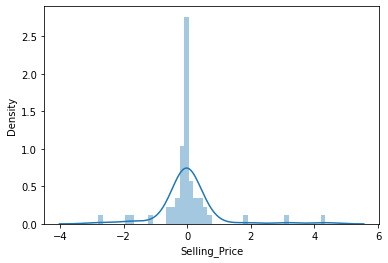

In [48]:
sns.distplot(y_test-predictions)

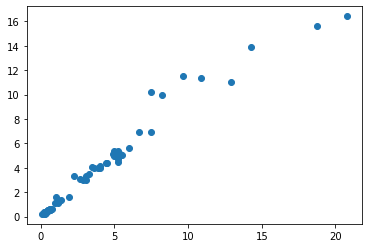

In [49]:
plt.scatter(y_test,predictions)

In [50]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)